In [1]:
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as graph
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.cross_validation import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.callbacks import TensorBoard

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


In [2]:
mnist = load_digits()

N = 1797
in = 64
out = 10


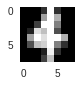

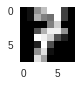

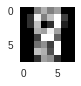

In [3]:
input_dimensions = mnist.data.shape[1]
output_dimensions = mnist.target_names.shape[0]

print('N =', len(mnist.data))
print('in =', input_dimensions)
print('out =', output_dimensions)

# Show a few examples
for i in np.random.randint(0, len(mnist.data), size=3):
    graph.figure(figsize=(1, 1))
    graph.imshow(mnist.images[i], cmap='gray', interpolation='nearest')
    graph.grid(False)
    graph.show()

What is this
[[  0.   0.   0.   1.  11.   0.   0.   0.]
 [  0.   0.   0.   7.   8.   0.   0.   0.]
 [  0.   0.   1.  13.   6.   2.   2.   0.]
 [  0.   0.   7.  15.   0.   9.   8.   0.]
 [  0.   5.  16.  10.   0.  16.   6.   0.]
 [  0.   4.  15.  16.  13.  16.   1.   0.]
 [  0.   0.   0.   3.  15.  10.   0.   0.]
 [  0.   0.   0.   2.  16.   4.   0.   0.]]
Answer Onehot
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]


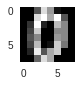

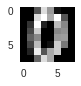

(1347, 64) (450, 64) (1347, 10) (450, 10)


In [4]:
x = MinMaxScaler().fit_transform(mnist.data)
y = OneHotEncoder(sparse=False).fit_transform(mnist.target.reshape(-1, 1))

print('What is this')
print(mnist.data[4].reshape(8, 8))
print('Answer Onehot')
print(y[4])

# Normal
graph.figure(figsize=(1, 1))
graph.imshow(mnist.data[0].reshape(8, 8), cmap='gray')
graph.grid(False)
graph.show()

# Normalised
graph.figure(figsize=(1, 1))
graph.imshow(x[0].reshape(8, 8), cmap='gray')
graph.grid(False)
graph.show()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

In [5]:
# Tensorboard?
tracker = TensorBoard(log_dir='./keras_logs', histogram_freq=1, write_graph=True, write_images=False)

# MODEL
model = Sequential()

# Input Layer
model.add(Dense(12, input_dim=input_dimensions, activation='relu'))

# 2nd Layer (Robuster)
model.add(Dense(24, activation='relu'))
model.add(Dropout(0.5))

# Final Layer (Collection)
model.add(Dense(12, activation='relu'))

# Output Layer
model.add(Dense(output_dimensions, activation='softmax'))

# Build
model.summary()
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Fit 
model.fit(
    x_train, y_train, 
    nb_epoch=1000, validation_split=0.25, 
    verbose=2, callbacks=[tracker]
)

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 12)            780         dense_input_1[0][0]              
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 24)            312         dense_1[0][0]                    
____________________________________________________________________________________________________
dropout_1 (Dropout)              (None, 24)            0           dense_2[0][0]                    
____________________________________________________________________________________________________
dense_3 (Dense)                  (None, 12)            300         dropout_1[0][0]                  
___________________________________________________________________________________________

In [12]:
test_score = model.evaluate(x_test, y_test, verbose=1)

print()
for metric, number in zip(model.metrics_names, test_score):
    print('{}: {}'.format(metric, number))

 32/450 [=>............................] - ETA: 0s
loss: 0.35782753804077705
acc: 0.9488888888888889
